# Names

In [1]:
from prep_n_load import *
from nlp_helpers import tokenize_and_count

Sun Jan  9 09:43:01 2022  UTC
6554 parcels loaded.


## Ratio of parcels without a name

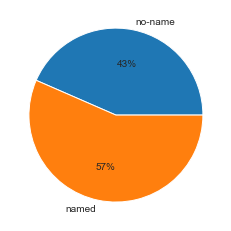

In [2]:
nonameratio = parcels[parcels.name.isna()].id.count() / parcels.shape[0]
_, ax = plt.subplots()
_ = ax.pie([nonameratio, 1 - nonameratio], labels=["no-name", "named"], autopct="%1.0f%%")


## Often used words in parcel names

In [3]:
from collections import Counter
all_names = (p["name"] for p in parcels_json if p["name"] and len(p["name"]) > 1)
c = Counter()
for name in all_names:
    c.update(tokenize_and_count(name))
print(counter_to_string(c, 50))


  425: gallery
  134: mvb
  112: art
   75: hq
   73: tower
   56: club
   52: nft
   48: pranksyland
   42: house
   42: center
   39: museum
   34: temple
   33: park
   32: mbc
   31: bronx
   31: beach
   28: sandbox
   27: dcl
   27: plazas
   26: studio
   26: blockchain
   25: garden
   24: crypto
   24: shop
   23: space
   23: tokyo
   22: satoshi
   22: group
   22: zonte
   21: store
   20: paraverse
   20: global
   20: solution
   20: vibes
   20: metaverse
   19: north
   19: exhibition
   19: tomato
   18: plaza
   18: collection
   18: milan
   18: berlin
   17: place
   17: meta
   17: lounge
   17: hub
   17: teleport
   17: building
   17: voxel
   17: portal


* MVB = Metaverse billboards

## Top used words per island

In [4]:
for island_name, row in (
    parcels[~parcels.name.isna()]
    .groupby("island")["name"]
    .apply(" ".join)
    .to_frame()
    .iterrows()
):
    print(island_name)
    print(counter_to_string(tokenize_and_count(row["name"])))
    print()

Berlin
   25: gallery
   18: berlin
   11: m0na
    8: magall
    7: blockchain
    7: global
    7: solution
    7: group
    6: art
    6: ebc

Ceres
    8: ceres
    5: gallery
    4: wei
    4: lounge
    3: mezzanine
    3: tower
    3: synoptic
    2: pride
    2: voxel
    2: market

Electron
    5: electron
    3: paraverse
    2: hall
    1: pixls
    1: pride
    1: gallery
    1: central
    1: mvb
    1: teleport
    1: vandao

Euro
    5: euro
    4: tower
    3: portal
    3: gallery
    2: metaversatile
    2: studios
    2: zandihar
    2: vtg
    2: hub
    1: eurotower

Far Far Away
   12: school
   12: data
   12: science
    8: far
    5: gallery
    5: away
    2: shore
    2: uncle
    2: bitcoin
    2: pixel

Helios
   16: gallery
   10: helios
    8: art
    6: nemausa
    6: corner
    4: row
    4: studio
    3: blavinci
    3: lala
    3: crypto

Honolulu
    2: adida
    2: intl
    2: mrkt
    2: metaverse
    1: 奶奶庙grandma
    1: temple
    1: steel
    1:

* The people in Bronx sure like their island name.